# Initial Atlas Application

## Purpose:

This file was created to understand how to apply an atlas to an fMRI file and store data into a `pandas` dataframe.

The content of this file may be incorrect for the purposes of the research project

## Results:

A `pandas` dataframe with rows representing the voxels of the fMRI file and features representing the region assigned by the atlas and raw data for each time point

## Contents

1. Load Data: Loading the fMRI file and atlas

2. Generate Dataframe: Creating the desired dataframe

    a. Time data: Adding the raw data based on the time parameter of the fRMI file
    
    b. Atlas data: Adding the atlas data to the respective voxels

**----------------------------------------------------------------------------------------------------------------------------**

## Load Data

This is where the data will be loaded. For simplicity, only one fMRI file will be loaded and have the atlas applied

### fMRI File

This is a sample of an image that will have the atlas applied to it.

This particular image is from patient 0026001 who was screened at the Brown University site

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt

img = nib.load('Brown/0026001/sfnwmrda0026001_session_1_rest_1.nii.gz')
img_data = img.get_fdata()

img_data.shape

(49, 58, 47, 247)

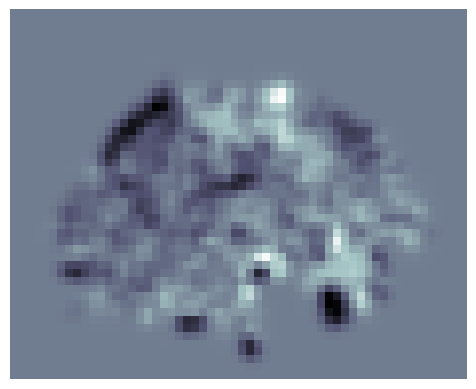

In [3]:
import scipy.ndimage as ndi

plt.imshow(ndi.rotate(img_data[25, :, :, 0], 90), cmap='bone')
plt.axis('off')
plt.show()

### Atlas

This is the atlas template that will be applied to the images. 

The image shows one slice of the file with different colors signifying different regions

In [4]:
atlas = nib.load('ADHD200_AAL_TCs_filtfix/templates/aal_mask_pad.nii.gz')
atlas_data = atlas.get_fdata()

atlas_data.shape

(49, 58, 47)

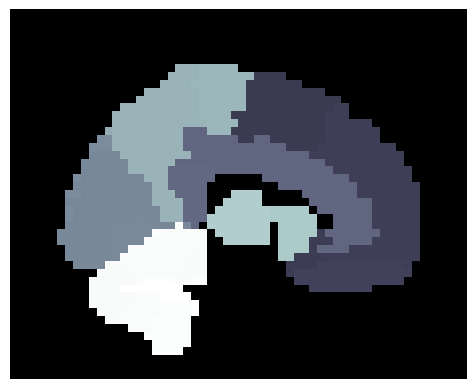

In [5]:
plt.imshow(ndi.rotate(atlas_data[25, :, :], 90), cmap='bone')
plt.axis('off')
plt.show()

## Generate DataFrame

Create a dataframe containing information about each point.

### DataFrame Structure

The dataframe will contain all important information for each point in the fMRI file.

**Contents:**

- Rows will represent each individual point in the file

- Columns will represent features

    - First column will indicate which region the atlas assigned to point to
    
    - All columns following will be the raw data for each moment in time

### Time data

The first information in the dataframe will be the raw data.

The fMRI file contains data for 247 time values, each having unique values for the points in the file. It is important to capture all of this data in the dataframe.

The columns in this dataframe have added `'time_'` before the time value for clarity

In [13]:
import pandas as pd
column_names = ['time_' + str(i) for i in range(247)]

df_times = pd.DataFrame(img_data.reshape(-1, 247), columns = column_names)
df_times.head()

,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,...,time_237,time_238,time_239,time_240,time_241,time_242,time_243,time_244,time_245,time_246
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Mean Time

This adds a column for the mean value of each of the time points. This could be useful to see a general view of how each region corresponds to the voxel

In [15]:
means = df_times.mean(axis=1)
df_times.insert(0, 'time_mean', means)
df_times.head()

,time_mean,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,...,time_237,time_238,time_239,time_240,time_241,time_242,time_243,time_244,time_245,time_246
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Atlas data

The data from the atlas is then added to the dataframe. 

The atlas file contains a value for each voxel in the file that assigns it to a region of the brain determiend by neuroscientists.

This column was added as the first column in the dataframe to elimintate the need to scroll to see the feature. The name of the column was changed to better represent the data it contains.

In [16]:
df_full = pd.concat([pd.Series(atlas_data.reshape(-1)), df_times], axis=1)
df_full = df_full.rename(columns={0:'atlas_region'})
df_full.head()

,atlas_region,time_mean,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,...,time_237,time_238,time_239,time_240,time_241,time_242,time_243,time_244,time_245,time_246
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The atlas has assigned the points to 117 unique regions.

In [17]:
df_full['atlas_region'].nunique()

117

### Region x Time DataFrame

This dataframe contains only the region assigned by the atlas and the mean of the raw_data values at each time.

In [18]:
df_region_x_time = df_full[['atlas_region','time_mean']]

df_region_x_time.head()

,atlas_region,time_mean
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


This shows the mean value for each region

In [21]:
regions = df_region_x_time.groupby('atlas_region').mean()
regions

,time_mean
atlas_region,
0.0,0.000295
2001.0,-0.005261
2002.0,0.001599
2101.0,-0.022958
2102.0,0.007711
...,...
9130.0,-0.005743
9140.0,0.004223
9150.0,0.019164


The maximum and minimum regions

In [26]:
print('Maximum region mean:', regions.max())
print('Maximum region mean:', regions.min())

Maximum region mean: time_mean    0.040385
dtype: float64
Maximum region mean: time_mean   -0.078586
dtype: float64
